[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#7E6148FF"

Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




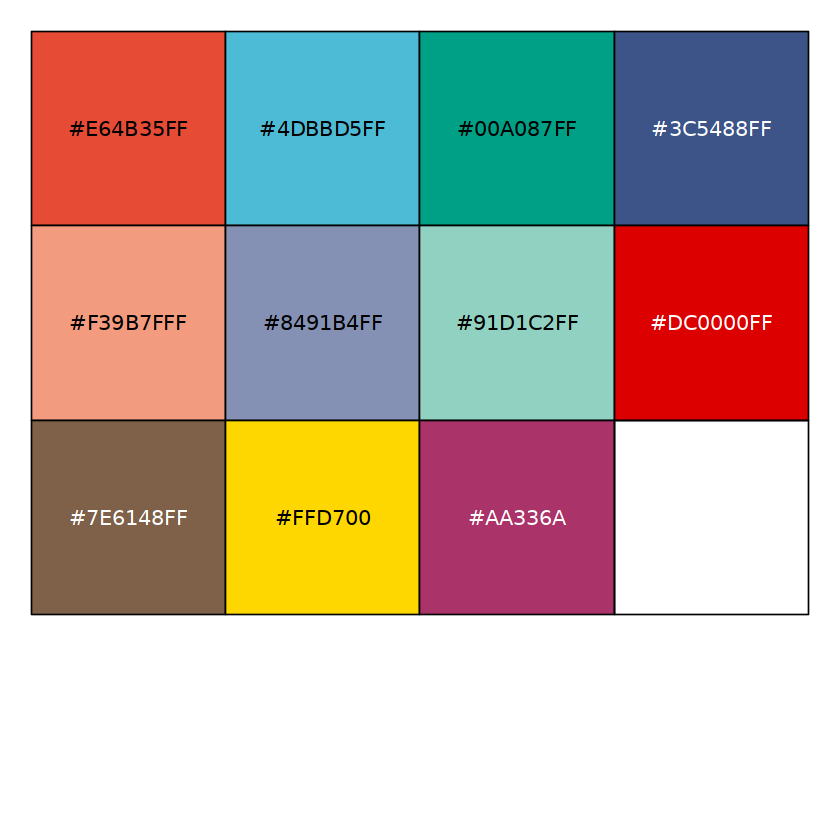

In [2]:
library(tidyverse)

options(scipen=999)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.cols=50)


library(cowplot)

library(patchwork)
library(ggsci)

pal_npg("nrc")(9)

color_pal = readRDS("../results/methods_color_pal.rds")

library(viridis)
library(scales)

show_col(color_pal)

library(ggpubr)
library(scales)


text_sizes <- theme(axis.text.x=element_text(size=9,colour="black"),
                      axis.text.y=element_text(size=9,colour="black"),
                      axis.title.y=element_text(size=9,colour="black", margin = margin(t = 2, l = 2, r = 2, b =2, unit = "pt")),
                      axis.title.x=element_text(size=9,colour="black", margin = margin(t = 2, l = 2, r = 2, b = 2, unit = "pt")),
                      legend.text = element_text(size=9,colour="black"),
                      legend.title = element_text(size=9,colour="black", margin = margin(t = 5, l = 0, r = 0, b = 5, unit = "pt")),
                      legend.key = element_rect(colour="transparent", fill = "transparent"),
                      strip.text.x = element_text(size=6,color = 'black',face="bold", angle=0),
                      strip.text.y = element_text(size=6,color = 'black', face="bold", angle=0, vjust=0.5, hjust=0),
                      axis.ticks= element_line(color = 'black', size=0.2),
                      axis.line = element_line(colour = "black", size = 0.2, linetype = "solid"),
                      plot.margin=unit(c(2,2,2,2),"pt"),
                      plot.title=element_text(size=10, face="bold", colour="black"))


common_minimal <- text_sizes + theme(
        plot.background = element_rect(fill = NA,colour = NA),
        strip.background = element_rect(fill = NA,colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect(colour = 'transparent', fill='transparent'), #transparent legend bg
        legend.box.background = element_rect(colour = 'transparent', fill='transparent')) + theme(
        legend.spacing = unit(0.15, 'cm'), 
        legend.key.size = unit(0.2, "cm"))


# commonly used, x axis text 45 degree
common_0x <- common_minimal + theme(axis.text.x = element_text(angle=0))

In [3]:
### Using pancreas task as example

In [4]:
task_now = 'Pancreas_hs_mm'

In [5]:
all_scores = read_csv("../results/all_tasks_metrics_scores_ranks.csv")
species_order = c("hsapiens", "mfascicularis", "mmulatta", "mmusculus", "sscrofa", "xtropicalis", "drerio")

Rows: 480 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): type, integration_method_batch, homology_method_batch, integration...
dbl (39): PCR, iLISI, bASW, GC, kBET, bASW_scaled, GC_scaled, kBET_scaled, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
all_metrics <- all_scores %>% filter(task_name == task_now)
all_methods = levels(factor(all_metrics$integration_method_batch))
color_pal

fastMNN       Harmony         LIGER   LIGER UINMF         SAMap 
  "#E64B35FF"   "#4DBBD5FF"   "#00A087FF"   "#3C5488FF"   "#F39B7FFF" 
    Scanorama        scANVI          scVI  SeuratV4 CCA SeuratV4 RPCA 
  "#8491B4FF"   "#91D1C2FF"   "#DC0000FF"   "#7E6148FF"     "#FFD700" 
 unintegrated 
    "#AA336A"

In [11]:
head(all_metrics)

type,PCR,iLISI,bASW,GC,kBET,integration_method_batch,homology_method_batch,bASW_scaled,GC_scaled,kBET_scaled,PCR_scaled,iLISI_scaled,avg_score_batch,iLISI_scaled_rank,GC_scaled_rank,PCR_scaled_rank,bASW_scaled_rank,kBET_scaled_rank,avg_score_scaled_rank_batch,cASW,cLISI,ARI,NMI,iso_F1,integration_method_bio,homology_method_bio,cASW_scaled,ARI_scaled,NMI_scaled,iso_F1_scaled,cLISI_scaled,avg_score_bio,cLISI_scaled_rank,NMI_scaled_rank,ARI_scaled_rank,cASW_scaled_rank,iso_F1_scaled_rank,avg_score_scaled_rank_bio,integrated_score,integrated_score_rank,task_name,trajectory_conservation_score_batch,traj_scaled,traj_scaled_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
scANVI SH,0.007285071,0.1526515,0.9057237,0.9599731,0.4512883,scANVI,SH,0.9763774,0.9232030,0.8069011,0.9524555,0.7781080,0.9147342,6,4,11,4,14,5,0.6615793,1,0.9719818,0.9488773,0.4476222,scANVI,SH,0.8975643,0.9981463,0.9941012,0.9454898,1,0.9588254,1,2,2,3,3,1,0.9411889,1,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA HE,0.003919923,0.1640826,0.8572452,0.9572954,0.4768689,SeuratV4 RPCA,HE,0.8535639,0.9141284,0.8827792,0.9780889,0.8363754,0.9071401,3,8,9,11,8,8,0.6605275,1,0.9501843,0.9162462,0.4285387,SeuratV4 RPCA,HE,0.8920234,0.9690571,0.9266723,0.8790062,1,0.9166897,1,8,4,4,13,4,0.9128699,2,Pancreas_hs_mm,NA,NA,NA
scANVI O2O,0.007466040,0.1406177,0.9019474,0.9603564,0.4726367,scANVI,O2O,0.9668107,0.9245017,0.8702257,0.9510770,0.7167685,0.9281538,7,3,12,6,10,4,0.6512654,1,0.9733709,0.9517319,0.3937874,scANVI,O2O,0.8432278,1.0000000,1.0000000,0.7579389,1,0.9002917,1,1,1,10,17,7,0.9114365,3,Pancreas_hs_mm,NA,NA,NA
scANVI HE,0.006817178,0.1539172,0.9025827,0.9462154,0.4998071,scANVI,HE,0.9684200,0.8765788,0.9508193,0.9560196,0.7845597,0.9379594,5,14,10,5,2,3,0.6472848,1,0.9683344,0.9436026,0.3923515,scANVI,HE,0.8222572,0.9932788,0.9832016,0.7529363,1,0.8879185,1,3,3,11,18,8,0.9079349,4,Pancreas_hs_mm,NA,NA,NA
SeuratV4 CCA HE,0.001992488,0.1551500,0.8406176,0.9538206,0.4568441,SeuratV4 CCA,HE,0.8114402,0.9023525,0.8233809,0.9927708,0.7908435,0.8824861,4,11,6,14,12,11,0.6810232,1,0.9102121,0.8860825,0.4397528,SeuratV4 CCA,HE,1.0000000,0.9157135,0.8643422,0.9180745,1,0.9245325,1,12,12,1,6,3,0.9077140,5,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA SH,0.003728794,0.1140756,0.8571635,0.9178169,0.4904657,SeuratV4 RPCA,SH,0.8533570,0.7803383,0.9231105,0.9795448,0.5814757,0.8840876,9,18,8,12,4,9,0.6603950,1,0.9496948,0.9167934,0.4236480,SeuratV4 RPCA,SH,0.8913251,0.9684040,0.9278031,0.8619679,1,0.9123750,1,7,5,5,16,5,0.9010601,6,Pancreas_hs_mm,NA,NA,NA


In [12]:
all_metrics$integration_method <- all_metrics$integration_method_batch
all_metrics$homology_method <- all_metrics$homology_method_batch

In [16]:
## Assume we haven't calculated the scaled metrics and scores yet. Raw metrics was where we started with. 
## In this reproducibility repo I put the final complete results for retrieval.

In [17]:
all_metrics <- all_metrics %>% select(-ends_with("batch")) %>% select(-ends_with("bio"))  %>% select(-ends_with("scaled"))  %>% select(-ends_with("rank"))

In [19]:
## Calculate batch metrics rank
## silhouette and PCR does not work for SAMap

batch_metrics = all_metrics %>% select(PCR, iLISI, bASW, GC, kBET, integration_method, homology_method) %>%
mutate(type  = paste(integration_method, homology_method, sep = " ")) %>% 
mutate(bASW_scaled = (bASW - min(bASW, na.rm = TRUE)) / (max(bASW, na.rm = TRUE) - min(bASW, na.rm = TRUE))) %>% 
mutate(GC_scaled = (GC - min(GC)) / (max(GC) - min(GC)))  %>% 
mutate(kBET_scaled = (kBET - min(kBET)) / (max(kBET) - min(kBET))) %>% 
mutate(PCR_scaled = (max(PCR, na.rm = TRUE) - PCR) / (max(PCR, na.rm = TRUE) - min(PCR, na.rm = TRUE))) %>% 
mutate(iLISI_scaled = (iLISI - min(iLISI)) / (max(iLISI) - min(iLISI))) %>% 
mutate(avg_score = (bASW_scaled + GC_scaled + kBET_scaled + PCR_scaled ) / 4) %>% ## removed LISI scores
arrange(desc(avg_score)) %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(GC_scaled_rank = dense_rank(desc(GC_scaled)))%>% 
mutate(PCR_scaled_rank = dense_rank(desc(PCR_scaled)))%>% 
mutate(bASW_scaled_rank = dense_rank(desc(bASW_scaled))) %>% 
mutate(kBET_scaled_rank = dense_rank(desc(kBET_scaled))) %>% 
mutate(avg_score_scaled_rank = dense_rank(desc(avg_score)))

dim(batch_metrics)
## Bio conservation metrics and rank

bio_metrics = all_metrics %>% select(cASW, cLISI, ARI, NMI, iso_F1, integration_method, homology_method) %>%
mutate(type  = paste(integration_method, homology_method, sep = " ")) %>% 
mutate(cASW_scaled = (cASW - min(cASW, na.rm = TRUE)) / (max(cASW, na.rm = TRUE) - min(cASW, na.rm = TRUE))) %>% 
mutate(ARI_scaled = (ARI - min(ARI)) / (max(ARI) - min(ARI)))  %>% 
mutate(NMI_scaled = (NMI - min(NMI)) / (max(NMI) - min(NMI))) %>% 
mutate(iso_F1_scaled = (iso_F1 - min(iso_F1)) / (max(iso_F1) - min(iso_F1))) %>% 
mutate(cLISI_scaled = (cLISI - min(cLISI)) / (max(cLISI) - min(cLISI))) %>% 
mutate(avg_score = (cASW_scaled + ARI_scaled + NMI_scaled + iso_F1_scaled) / 4) %>%  ## removed LISI scores, no Traj score due to no trajectory in dataset
arrange(desc(avg_score)) %>% 
mutate(cLISI_scaled_rank = dense_rank(desc(cLISI_scaled)))%>% 
mutate(NMI_scaled_rank = dense_rank(desc(NMI_scaled)))%>% 
mutate(ARI_scaled_rank = dense_rank(desc(ARI_scaled)))%>% 
mutate(cASW_scaled_rank = dense_rank(desc(cASW_scaled))) %>% 
mutate(iso_F1_scaled_rank = dense_rank(desc(iso_F1_scaled))) %>% 
mutate(avg_score_scaled_rank = dense_rank(desc(avg_score))) 

dim(bio_metrics)

## integrated score

order_final = merge(batch_metrics, bio_metrics, by = 'type', suffixes = c("_batch", "_bio")) %>% 
mutate(integrated_score = avg_score_batch*0.4 + avg_score_bio*0.6) %>% 
arrange(desc(integrated_score)) %>% pull(type)

order_final

integrated_ranked = merge(batch_metrics, bio_metrics, by = 'type', suffixes = c("_batch", "_bio")) %>% 
mutate(integrated_score = avg_score_batch*0.4 + avg_score_bio*0.6) %>% 
mutate(integrated_score_rank = dense_rank(x = desc(integrated_score))) %>% 
arrange(desc(integrated_score))
    
    

[1] 30 20

[1] 30 20

[1] "scANVI SH"         "SeuratV4 RPCA HE"  "scANVI O2O"       
 [4] "scANVI HE"         "SeuratV4 CCA HE"   "SeuratV4 RPCA SH" 
 [7] "SeuratV4 CCA SH"   "SeuratV4 RPCA O2O" "SeuratV4 CCA O2O" 
[10] "fastMNN SH"        "Harmony SH"        "Harmony HE"       
[13] "fastMNN O2O"       "fastMNN HE"        "Harmony O2O"      
[16] "Scanorama HE"      "Scanorama SH"      "Scanorama O2O"    
[19] "scVI SH"           "scVI O2O"          "LIGER UINMF SH"   
[22] "scVI HE"           "unintegrated HE"   "unintegrated SH"  
[25] "LIGER O2O"         "unintegrated O2O"  "LIGER SH"         
[28] "LIGER HE"          "LIGER UINMF HE"    "LIGER UINMF O2O"

In [24]:
options(repr.plot.width = 5, repr.plot.height = 10)

### Integrated score

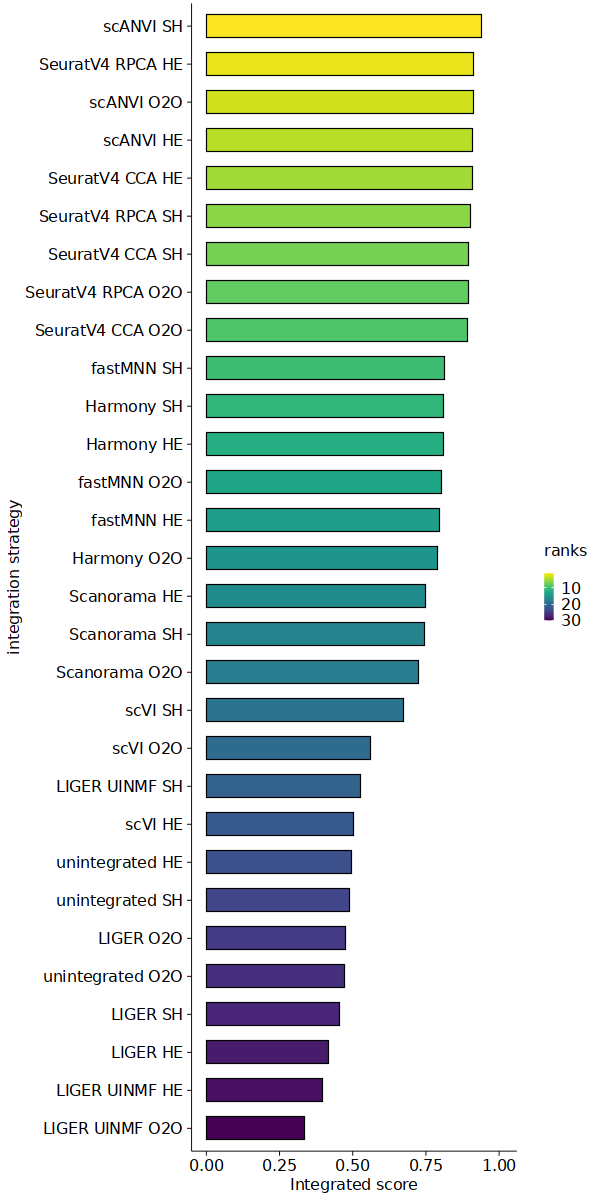

In [25]:
integrated_bar = merge(batch_metrics, bio_metrics, by = 'type', suffixes = c("_batch", "_bio")) %>% 
mutate(integrated_score = avg_score_batch*0.4 + avg_score_bio*0.6) %>% 
mutate(integrated_score_rank = dense_rank(x = desc(integrated_score))) %>% 
arrange(desc(integrated_score)) %>% 
ggplot(aes(x = factor(type, levels = order_final), y = integrated_score)) + 
geom_bar(aes(fill = integrated_score_rank), stat = 'identity',width=0.6, color='black', size=0.25) + 
coord_flip() + common_0x + 
labs(y = 'Integrated score', x = 'integration strategy') + 
scale_fill_viridis(name = 'ranks', option = 'viridis', direction = 1, trans = 'reverse') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) +
theme(axis.text.x = element_text(size = 9))

integrated_bar

### Species mixing score

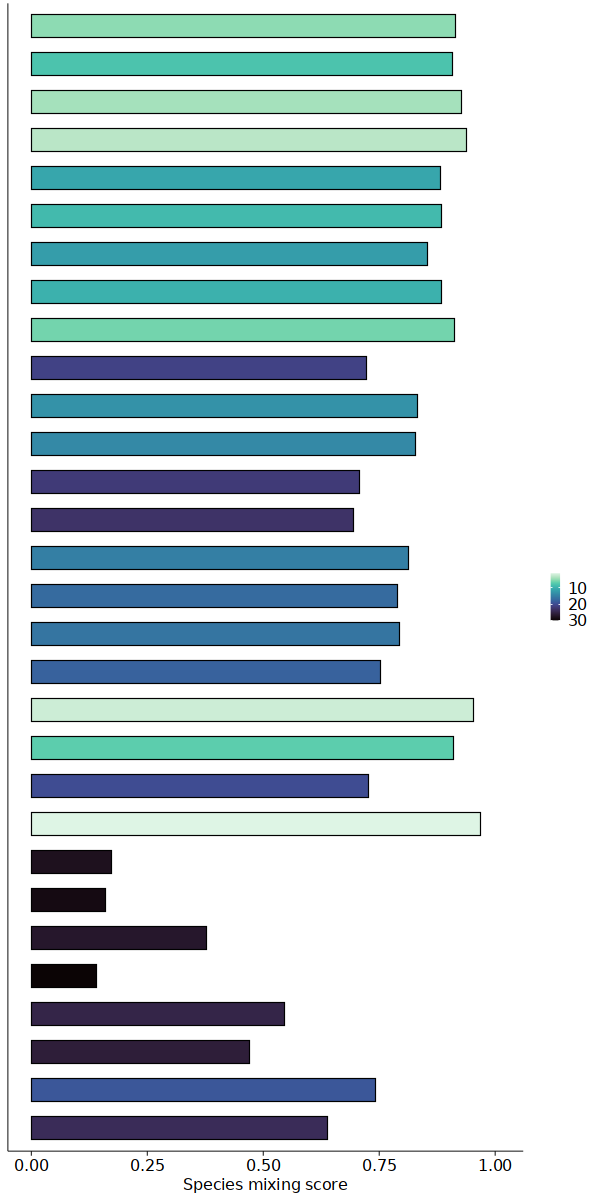

In [26]:
batch_avg_score_hist = batch_metrics %>% 
ggplot(aes(x = factor(type, levels = order_final), y = avg_score)) + 
geom_bar(aes(fill = avg_score_scaled_rank), stat = 'identity',width=0.6, color='black', size=0.25) + 
coord_flip() + common_0x + 
labs(y = 'Species mixing score', x = 'integration strategy') + 
scale_fill_viridis(option = 'mako', direction = 1, trans = 'reverse', name = "") +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev)  +
theme(axis.text.x = element_text(size = 9)) +
theme(axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.title.y = element_blank())

batch_avg_score_hist

In [27]:
options(repr.plot.width = 5, repr.plot.height = 10)

### Batch correction metrics

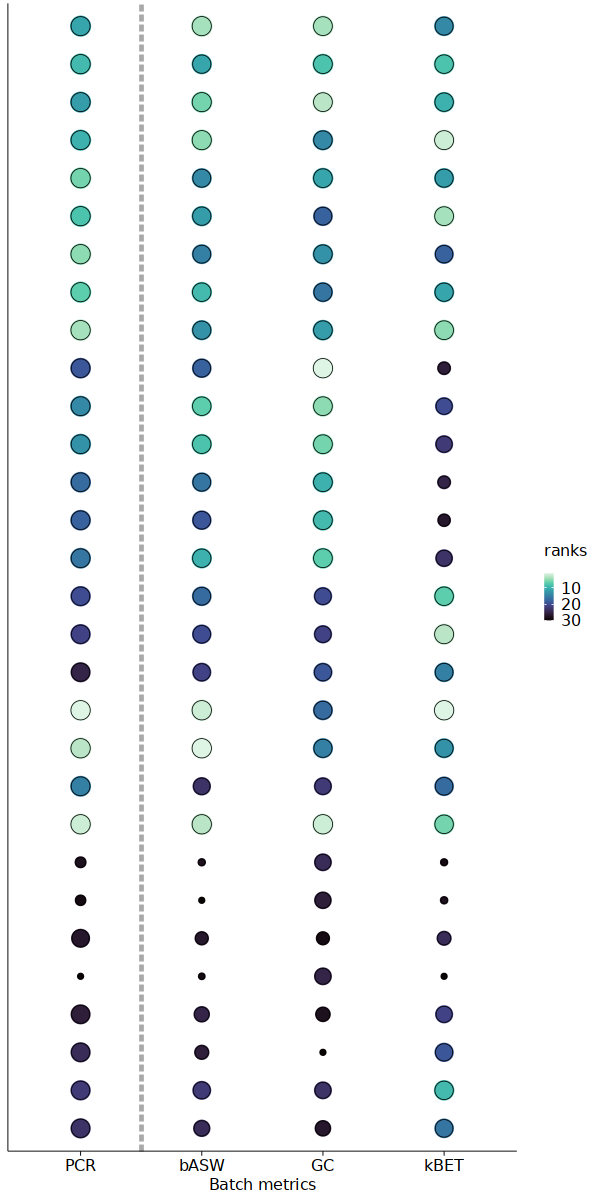

In [28]:
metrics_order = c("PCR", "bASW", "GC", "kBET")

batch_individual_scores = batch_metrics %>% 
select(-c(avg_score, avg_score_scaled_rank)) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("kBET", Metrics), kBET_scaled, ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("GC", Metrics), GC_scaled, ifelse(grepl("ASW", Metrics), bASW_scaled, PCR_scaled))))) %>%
mutate(Metrics = gsub("GC_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("PCR_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("bASW_scaled_rank", "bASW", Metrics)) %>% 
mutate(Metrics = gsub("kBET_scaled_rank", "kBET", Metrics)) %>%   
filter(Metrics != 'iLISI') %>% 
ggplot(aes(x = factor(type, levels = order_final), y = factor(Metrics, levels = metrics_order), size = scores)) + 
geom_point(aes(color = ranks)) + 
geom_point(shape = 1,colour = "black", stroke=0.25) + 
coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(),
      axis.title.y = element_blank(), 
      panel.background = element_blank()) + 
scale_color_viridis(option = 'mako', direction = 1, trans = 'reverse') +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 5), guide = 'none') + labs(y = 'Batch metrics') +
theme(axis.text.x = element_text(size = 9)) + geom_hline(yintercept = 1.5, size=1, linetype='longdash', color='dark gray')

batch_individual_scores

In [29]:
options(repr.plot.width = 10, repr.plot.height = 10)

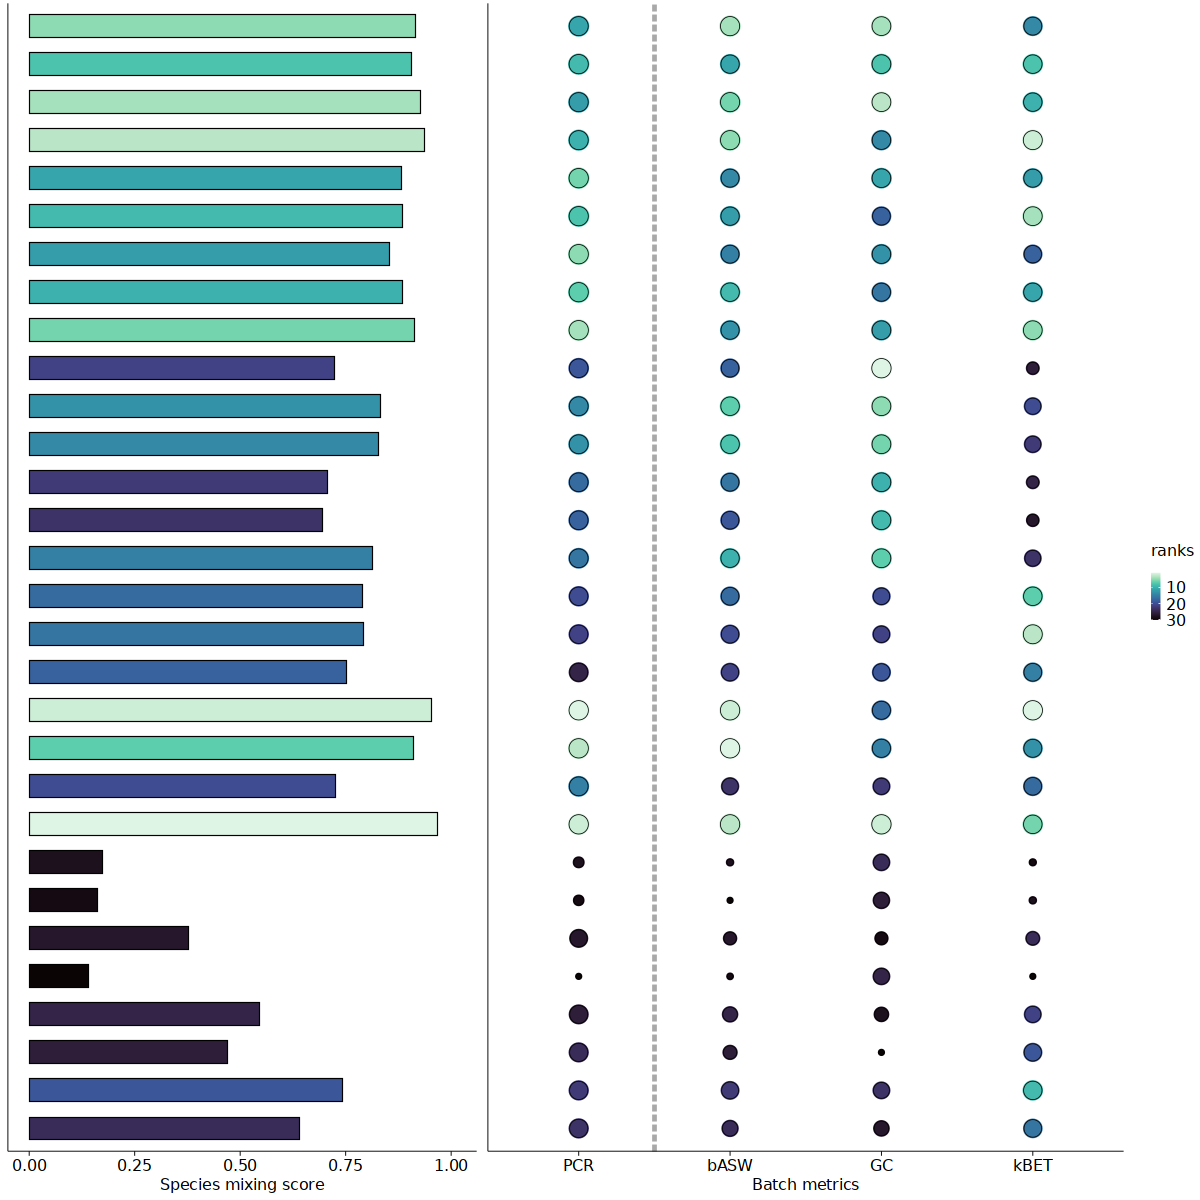

In [30]:
batch_fig = plot_grid(batch_avg_score_hist + theme(legend.position = 'none'), batch_individual_scores, nrow = 1, rel_widths = c(1, 1.5))

batch_fig

### Biology conservation scores and metrics

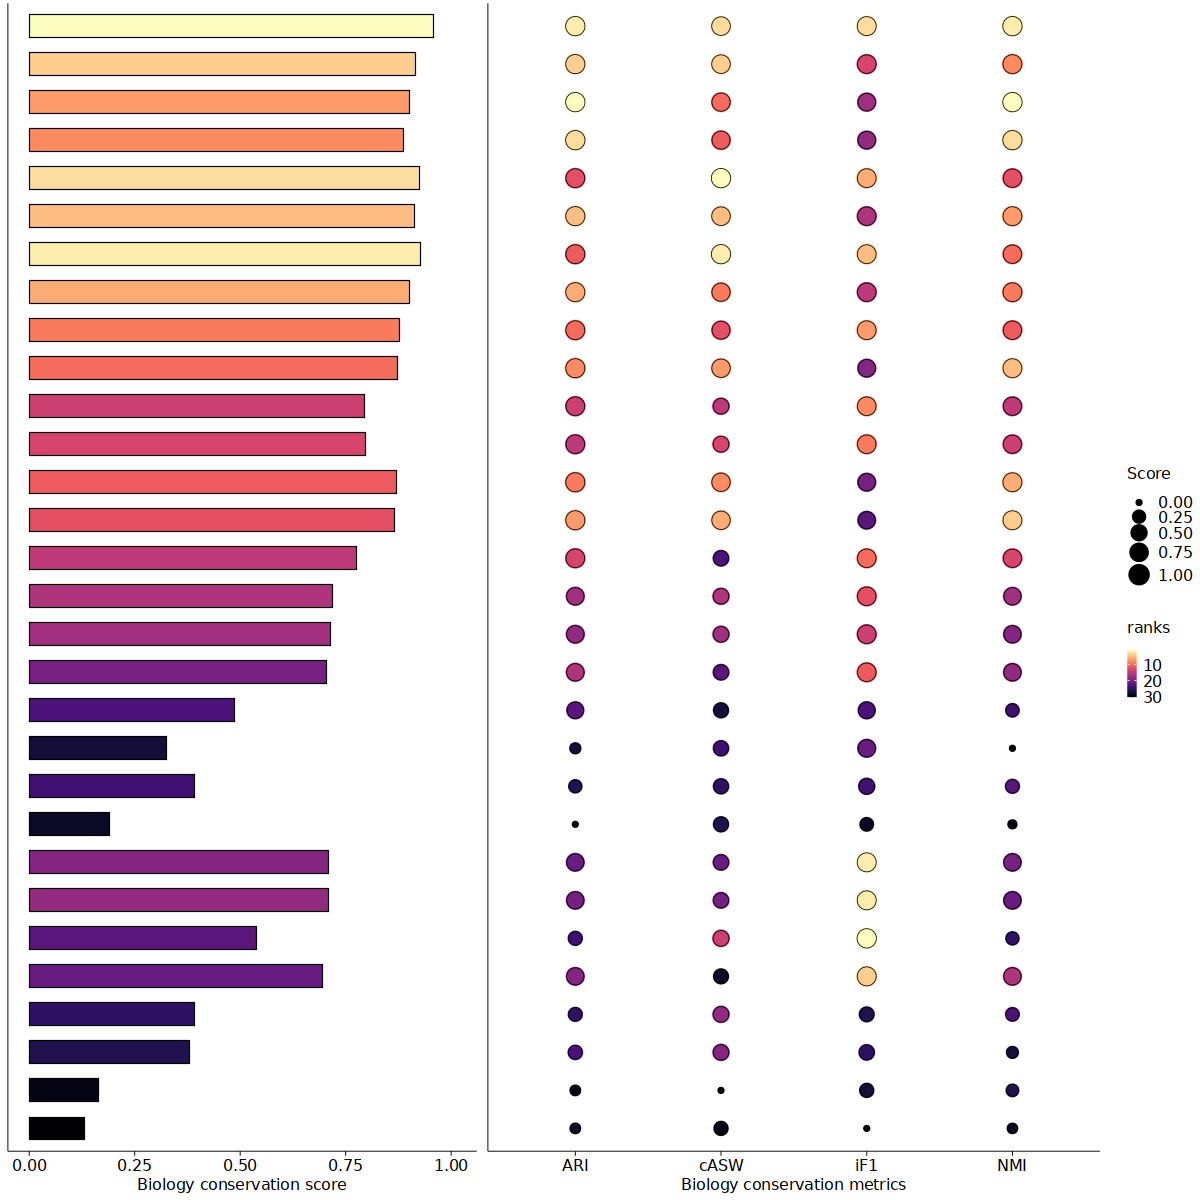

In [31]:
bio_bar = bio_metrics %>% 
mutate(avg_score_scaled_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_final), y = avg_score)) + 
geom_bar(aes(fill = avg_score_scaled_rank), stat = 'identity', width=0.6, color='black', size=0.25) + 
coord_flip() + common_0x + 
labs(y = 'Biology conservation score', x = 'integration strategy') + 
scale_fill_viridis(option = 'magma', direction = 1, trans = 'reverse', name = "") +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) +
theme(axis.text.x = element_text(size = 9)) +
theme(axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.title.y = element_blank())

bio_individual_scores = bio_metrics %>% 
select(-c(avg_score, avg_score_scaled_rank)) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("cASW", Metrics), cASW_scaled, iso_F1_scaled))))) %>%
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("cASW_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("iso_F1_scaled_rank", "iF1", Metrics)) %>% 
filter(Metrics != 'cLISI') %>% 
ggplot(aes(x = factor(type, levels = order_final), y = Metrics, size = scores)) + 
geom_point(aes(color = ranks)) + 
geom_point(shape = 1,colour = "black", stroke=0.25) + 
coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + 
scale_color_viridis(option = 'magma', direction = 1, trans = 'reverse') +
scale_alpha_continuous(name = 'Rank', trans = reverse_trans(), breaks = c(5,10,15,20,25,30)) + 
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 5)) + labs(y = 'Biology conservation metrics') +
theme(axis.text.x = element_text(size = 9))


bio_fig = plot_grid(bio_bar + theme(legend.position = 'none'), bio_individual_scores, nrow = 1, rel_widths = c(1, 1.5))

bio_fig

### Final figure

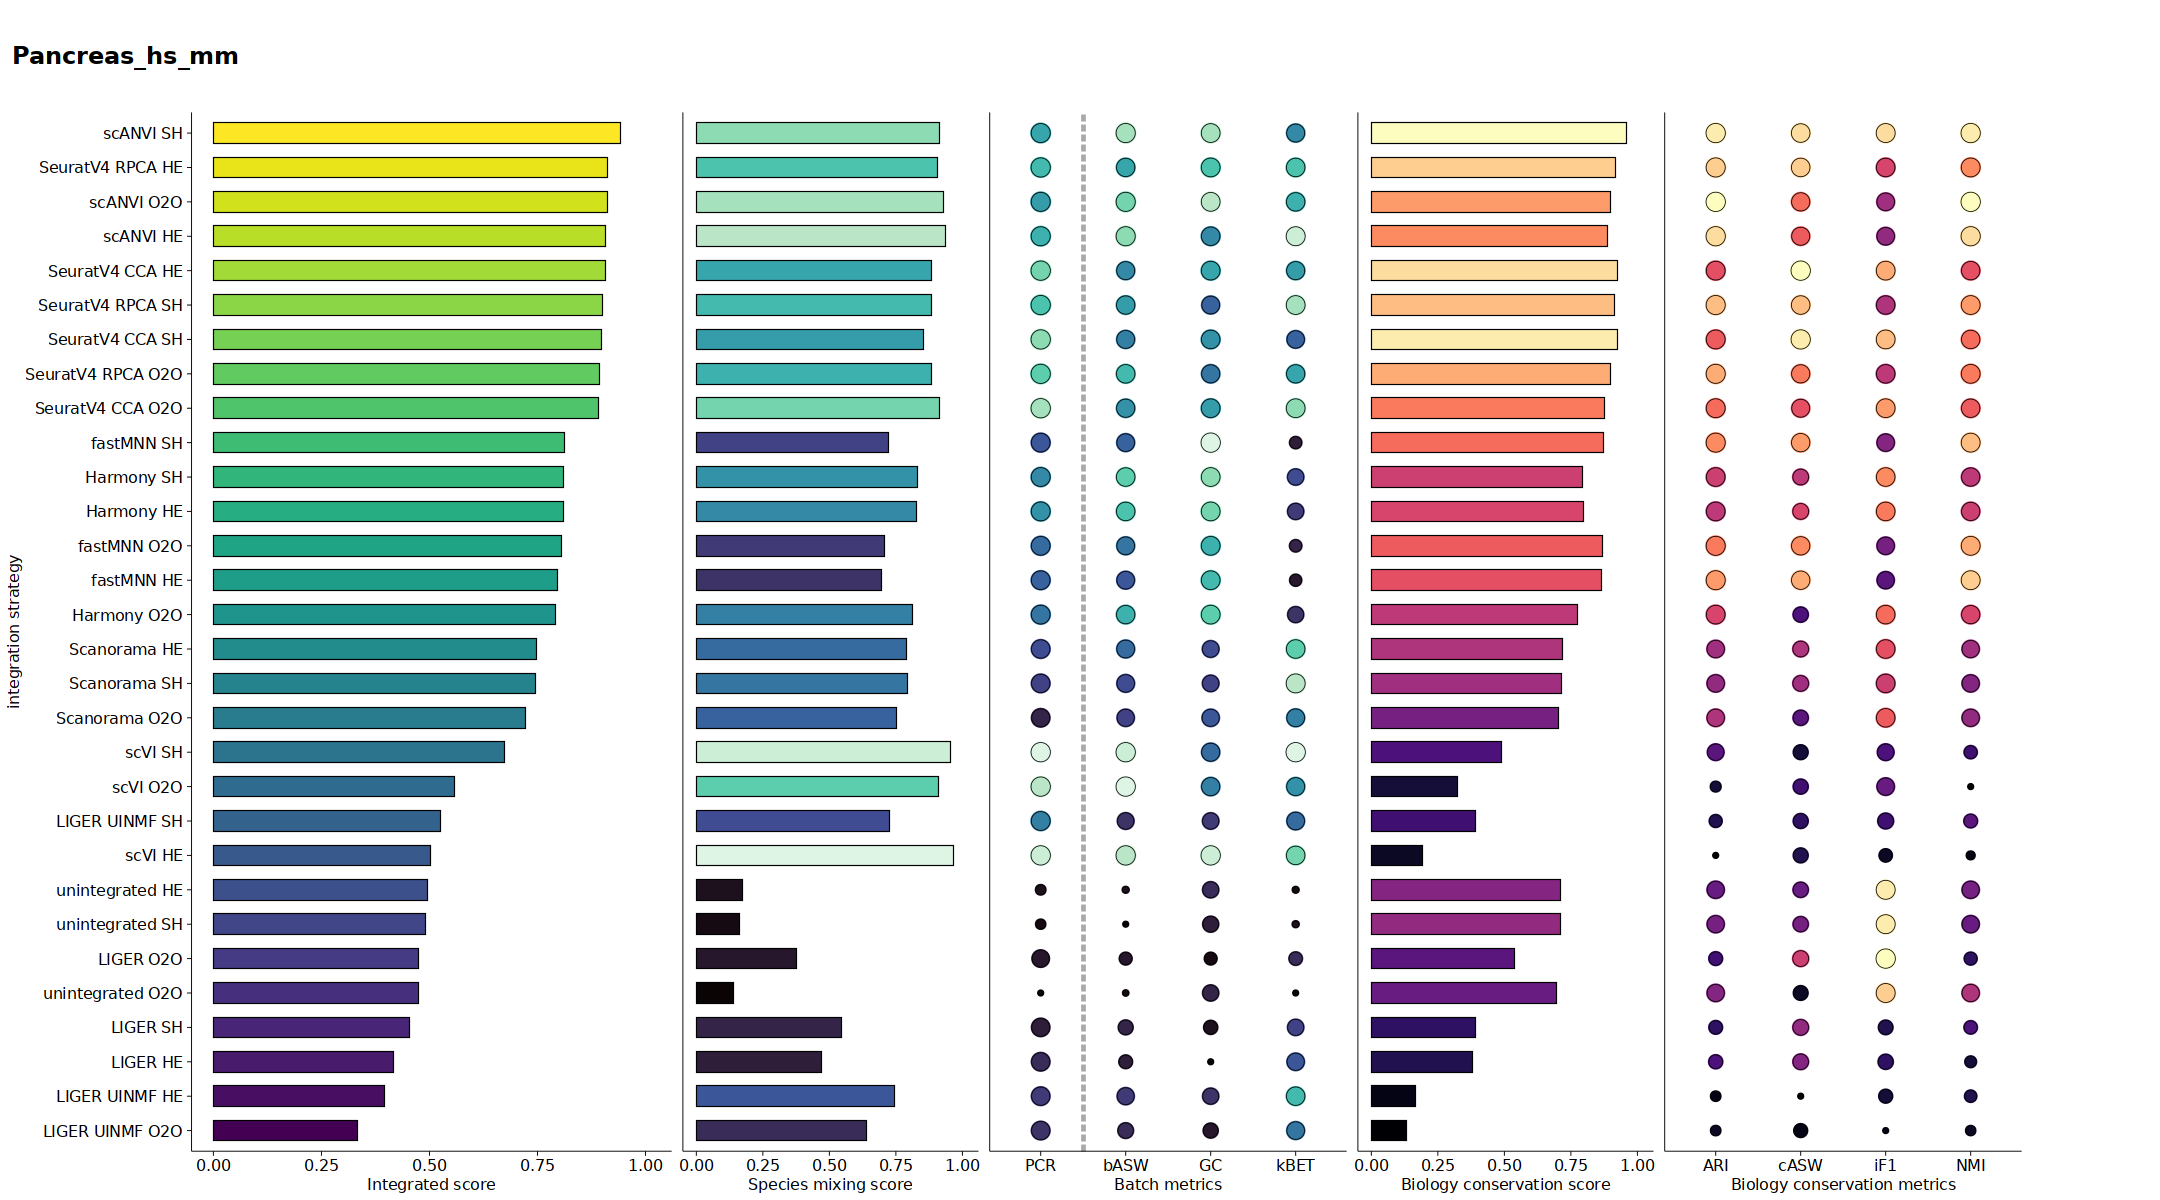

In [33]:
options(repr.plot.width = 18)
        
        
intg_legend = get_legend(integrated_bar)
integrated_bar = integrated_bar + theme(legend.position = 'none')

batch_legend = get_legend(batch_individual_scores)
batch_individual_scores = batch_individual_scores + theme(legend.position = 'none')

batch_fig = plot_grid(batch_avg_score_hist + theme(legend.position = 'none'), batch_individual_scores, nrow = 1, rel_widths = c(1, 1.2))

bio_legend = get_legend(bio_individual_scores)
bio_individual_scores = bio_individual_scores + theme(legend.position = 'none')

bio_fig = plot_grid(bio_bar + theme(legend.position = 'none'), bio_individual_scores, nrow = 1, rel_widths = c(1, 1.2))


legends = plot_grid(plot_grid(intg_legend, bio_legend, batch_legend, ncol = 1, rel_heights = c(0.5, 1, 0.5), 
                              align = 'v', axis = 'l'), NULL, ncol = 1, rel_heights = c(1, 0.5))



plot_all =  plot_grid(integrated_bar, batch_fig , bio_fig, legends, nrow=1, rel_widths = c(1, 1, 1, 0.2), align = 'lb', axis = 'hv')

# now add the title
title <- ggdraw() + 
  draw_label(
    'Pancreas_hs_mm',
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )


fig_final = plot_grid(
  title, plot_all,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

fig_final
    